# **ANN**
**Steps to Build an ANN**
1. Import Libraries
2. Load MNIST Dataset
3. Normalize the Images
4. Reshape the Data
5. Define the ANN Model
6. Compile the Model
7. Train the Model
8. Evaluate the Model
9. Make Predictions
10. Display a Prediction

## **Step 1: Import Libraries**

In [78]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## **Step 2: Load and Preprocess the Data**
*  **28×28** grayscale images of handwritten digits (**0-9**).

In [79]:
# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

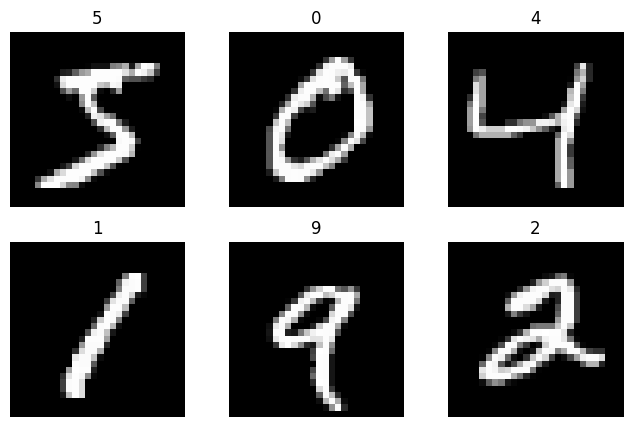

In [81]:
plt.figure(figsize=(8, 5))

for i in range(6):
  plt.subplot(2, 3, i+1)   # plt.subplot(rows, cols, index)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')

## **Step 3: Normalize the Images**
* Neural networks perform better when input values are **between 0 and 1**.
* Pixel values range from 0 to 255 (grayscale), we divide by 255.

In [82]:
# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

## **Step 4: Reshape the Data**
* Neural networks expect inputs as 1D arrays (vectors), but we've 2D (28×28)

In [83]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

`x_train = x_train.reshape(60000, 784)`

`x_train = x_train.reshape(-1, 784)`

* 60000 = -1 = total number of rows
* -1 makes the code more flexible, it works even if the number of images changes!

## **Step 5: Define the ANN Model**
* ANN with 3 layers using Keras

* How to choose neurons?
    * Start with a power of 2 (e.g., 32, 64, 128, 256).

In [85]:
# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784, )),  # First hidden layer | input also defined here
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Step 6: Compile the Model**

In [86]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])   # sparse = mcc

In [87]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 784) (60000,)
(10000, 784) (10000,)


## **Step 7: Train the Model**

* **epochs**=10 → The model will go through the dataset **10 times**.
* **validation_data**=(x_test, y_test) → Tests model **accuracy after each epoch**

In [88]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8740 - loss: 0.4328 - val_accuracy: 0.9646 - val_loss: 0.1134
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9698 - loss: 0.1000 - val_accuracy: 0.9693 - val_loss: 0.0956
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9789 - loss: 0.0673 - val_accuracy: 0.9688 - val_loss: 0.1073
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9827 - loss: 0.0528 - val_accuracy: 0.9774 - val_loss: 0.0768
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9873 - loss: 0.0385 - val_accuracy: 0.9746 - val_loss: 0.0868
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9893 - loss: 0.0309 - val_accuracy: 0.9802 - val_loss: 0.0654
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9917 - loss: 0.0249 - val_accuracy: 0.9765 - val_loss: 0.0818
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9928 - loss: 0.02

- The model makes predictions.
- It compares predictions to actual labels (loss calculation).
- It updates weights using backpropagation to improve predictions.
- This repeats for 10 epochs to improve accuracy.

## **Step 8: Evaluate the Model**
- loss (error) and accuracy (performance).

In [95]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.1224
Test accuracy: 0.9772
Test loss: 0.0962


## **Step 9: Make Predictions**

In [98]:
# Make predictions on test data
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


* **argmax** finds the digit with the highest probability.

## **Step 10: Display a Prediction**

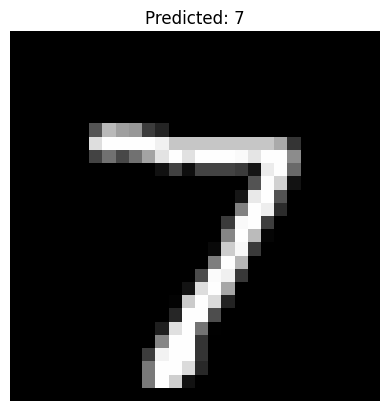

In [102]:
# Select a test image
index = 0  # You can change this index to see other images

plt.imshow(x_test[index].reshape(28, 28), cmap='gray')  # Reshape back to 28x28
plt.title(f"Predicted: {np.argmax(predictions[index])}")  # Show prediction
plt.axis('off')
plt.show()